In [5]:
from langgraph.graph import StateGraph , START , END
from typing import TypedDict

In [20]:
#define state

class BMIstate(TypedDict):

    weight : float
    height :float
    BMI :float
    category :str

In [25]:
def cal_BMI(state:BMIstate) -> BMIstate:
    weight = state["weight"]
    height = state["height"]

    BMI = weight/(height**2)

    state["BMI"] = round(BMI,2)

    return state




In [26]:
def label_BMI(state:BMIstate) -> BMIstate:
    bmi = state['BMI']

    if bmi < 18.5 :
        state['category'] = "Underweight"
    elif 18.5 <= bmi < 25 :
        state['category'] = "Normal"
    elif 25 <= bmi < 30 :
        state['category'] = "Overweight"
    else:
        state['category'] = "Obese"

    return state                    #state is getting updated


In [28]:
# define your graph

graph = StateGraph(BMIstate)

#adding nodes to graph

graph.add_node("calculate_BMI",cal_BMI)
graph.add_node("label_BMI",label_BMI)

#add edges

graph.add_edge(START,"calculate_BMI")
graph.add_edge("calculate_BMI","label_BMI")
graph.add_edge("label_BMI", END)


# compile the graph
workflow = graph.compile()
#execute the graph

In [29]:
initial_state ={'weight':80,'height':1.83}
final_state = workflow.invoke(initial_state)
print(final_state)

{'weight': 80, 'height': 1.83, 'BMI': 23.89, 'category': 'Normal'}


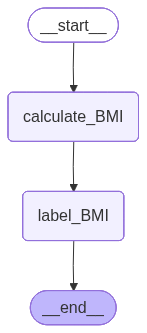

In [30]:
#viewing the graph

from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())